In [1]:
import numpy as np

import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.layers.core import Dense, Activation, Lambda, Flatten
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
print("Tensorflow: ",tf.__version__)
print("Keras: ",keras.__version__)

Tensorflow:  1.9.0
Keras:  2.2.0


# Read model structure from json file

If you run same TF and Keras version, then you can load the model structure with the following json file

In [3]:
#load structure from https://github.com/serengil/tensorflow-101/blob/master/model/openface_structure.json
#model = model_from_json(open("openface-samples/openface_structure.json", "r").read(), custom_objects={'tf': tf}) 

#load model weights from https://drive.google.com/file/d/1LSe1YCV1x-BfNnfb7DFZTNpv_Q9jITxn/view
#model.load_weights("openface-samples/openface_weights.h5")

# Construct model structure by hand

Different Keras versions might cause model loading troubles from json (E.g. bad marshall data, unknown opcode)

In this case, you can construct the model by hand

In [4]:
myInput = Input(shape=(96, 96, 3))

x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)
x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_1')(x)
x = Conv2D(64, (1, 1), name='conv2')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = Conv2D(192, (3, 3), name='conv3')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
x = Activation('relu')(x)
Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_2')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

# Inception3a
inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
inception_3a_pool = Activation('relu')(inception_3a_pool)
inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

# Inception3b
inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
inception_3b_pool = Activation('relu')(inception_3b_pool)
inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

# Inception3c
inception_3c_3x3 = Conv2D(128, (1, 1), strides=(1, 1), name='inception_3c_3x3_conv1')(inception_3b)
inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn1')(inception_3c_3x3)
inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
inception_3c_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3c_3x3)
inception_3c_3x3 = Conv2D(256, (3, 3), strides=(2, 2), name='inception_3c_3x3_conv'+'2')(inception_3c_3x3)
inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn'+'2')(inception_3c_3x3)
inception_3c_3x3 = Activation('relu')(inception_3c_3x3)

inception_3c_5x5 = Conv2D(32, (1, 1), strides=(1, 1), name='inception_3c_5x5_conv1')(inception_3b)
inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn1')(inception_3c_5x5)
inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
inception_3c_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3c_5x5)
inception_3c_5x5 = Conv2D(64, (5, 5), strides=(2, 2), name='inception_3c_5x5_conv'+'2')(inception_3c_5x5)
inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn'+'2')(inception_3c_5x5)
inception_3c_5x5 = Activation('relu')(inception_3c_5x5)

inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

#inception 4a
inception_4a_3x3 = Conv2D(96, (1, 1), strides=(1, 1), name='inception_4a_3x3_conv'+'1')(inception_3c)
inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'1')(inception_4a_3x3)
inception_4a_3x3 = Activation('relu')(inception_4a_3x3)
inception_4a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4a_3x3)
inception_4a_3x3 = Conv2D(192, (3, 3), strides=(1, 1), name='inception_4a_3x3_conv'+'2')(inception_4a_3x3)
inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'2')(inception_4a_3x3)
inception_4a_3x3 = Activation('relu')(inception_4a_3x3)

inception_4a_5x5 = Conv2D(32, (1,1), strides=(1,1), name='inception_4a_5x5_conv1')(inception_3c)
inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn1')(inception_4a_5x5)
inception_4a_5x5 = Activation('relu')(inception_4a_5x5)
inception_4a_5x5 = ZeroPadding2D(padding=(2,2))(inception_4a_5x5)
inception_4a_5x5 = Conv2D(64, (5,5), strides=(1,1), name='inception_4a_5x5_conv'+'2')(inception_4a_5x5)
inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn'+'2')(inception_4a_5x5)
inception_4a_5x5 = Activation('relu')(inception_4a_5x5)

inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)

inception_4a_pool = Conv2D(128, (1,1), strides=(1,1), name='inception_4a_pool_conv'+'')(inception_4a_pool)
inception_4a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_pool_bn'+'')(inception_4a_pool)
inception_4a_pool = Activation('relu')(inception_4a_pool)
inception_4a_pool = ZeroPadding2D(padding=(2, 2))(inception_4a_pool)

inception_4a_1x1 = Conv2D(256, (1, 1), strides=(1, 1), name='inception_4a_1x1_conv'+'')(inception_3c)
inception_4a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_1x1_bn'+'')(inception_4a_1x1)
inception_4a_1x1 = Activation('relu')(inception_4a_1x1)

inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

#inception4e
inception_4e_3x3 = Conv2D(160, (1,1), strides=(1,1), name='inception_4e_3x3_conv'+'1')(inception_4a)
inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'1')(inception_4e_3x3)
inception_4e_3x3 = Activation('relu')(inception_4e_3x3)
inception_4e_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4e_3x3)
inception_4e_3x3 = Conv2D(256, (3,3), strides=(2,2), name='inception_4e_3x3_conv'+'2')(inception_4e_3x3)
inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'2')(inception_4e_3x3)
inception_4e_3x3 = Activation('relu')(inception_4e_3x3)

inception_4e_5x5 = Conv2D(64, (1,1), strides=(1,1), name='inception_4e_5x5_conv'+'1')(inception_4a)
inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'1')(inception_4e_5x5)
inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
inception_4e_5x5 = ZeroPadding2D(padding=(2, 2))(inception_4e_5x5)
inception_4e_5x5 = Conv2D(128, (5,5), strides=(2,2), name='inception_4e_5x5_conv'+'2')(inception_4e_5x5)
inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'2')(inception_4e_5x5)
inception_4e_5x5 = Activation('relu')(inception_4e_5x5)

inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

#inception5a
inception_5a_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_3x3_conv'+'1')(inception_4e)
inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'1')(inception_5a_3x3)
inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
inception_5a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5a_3x3)
inception_5a_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5a_3x3_conv'+'2')(inception_5a_3x3)
inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'2')(inception_5a_3x3)
inception_5a_3x3 = Activation('relu')(inception_5a_3x3)

inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)

inception_5a_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_pool_conv'+'')(inception_5a_pool)
inception_5a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_pool_bn'+'')(inception_5a_pool)
inception_5a_pool = Activation('relu')(inception_5a_pool)
inception_5a_pool = ZeroPadding2D(padding=(1,1))(inception_5a_pool)

inception_5a_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5a_1x1_conv'+'')(inception_4e)
inception_5a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_1x1_bn'+'')(inception_5a_1x1)
inception_5a_1x1 = Activation('relu')(inception_5a_1x1)

inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

#inception_5b
inception_5b_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_3x3_conv'+'1')(inception_5a)
inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'1')(inception_5b_3x3)
inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
inception_5b_3x3 = ZeroPadding2D(padding=(1,1))(inception_5b_3x3)
inception_5b_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5b_3x3_conv'+'2')(inception_5b_3x3)
inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'2')(inception_5b_3x3)
inception_5b_3x3 = Activation('relu')(inception_5b_3x3)

inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)

inception_5b_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_pool_conv'+'')(inception_5b_pool)
inception_5b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_pool_bn'+'')(inception_5b_pool)
inception_5b_pool = Activation('relu')(inception_5b_pool)

inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

inception_5b_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5b_1x1_conv'+'')(inception_5a)
inception_5b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_1x1_bn'+'')(inception_5b_1x1)
inception_5b_1x1 = Activation('relu')(inception_5b_1x1)

inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
reshape_layer = Flatten()(av_pool)
dense_layer = Dense(128, name='dense_layer')(reshape_layer)
norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

# Final Model
model = Model(inputs=[myInput], outputs=norm_layer)

In [5]:
#https://drive.google.com/file/d/1LSe1YCV1x-BfNnfb7DFZTNpv_Q9jITxn/view
model.load_weights("openface_weights.h5")

# Common Functions

In [6]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(96, 96))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [7]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

"""def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))"""

def l2_normalize(x, axis=-1, epsilon=1e-10):
    output = x / np.sqrt(np.maximum(np.sum(np.square(x), axis=axis, keepdims=True), epsilon))
    return output

In [8]:
def displayImages(path1, path2):
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img(path1))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img(path2))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)

# Finding Vector Representations / Embeddings

In [9]:
p1 = 'openface-samples/katy-1.jpg'
p2 = 'openface-samples/katy-2.jpg'
p3 = 'openface-samples/miley-1.jpg'
p4 = 'openface-samples/miley-2.jpg'
p5 = 'openface-samples/angelina-1.jpg'
p6 = 'openface-samples/angelina-2.jpg'

In [10]:
img1_representation = model.predict(preprocess_image(p1))[0,:]
img2_representation = model.predict(preprocess_image(p2))[0,:]
img3_representation = model.predict(preprocess_image(p3))[0,:]
img4_representation = model.predict(preprocess_image(p4))[0,:]
img5_representation = model.predict(preprocess_image(p5))[0,:]
img6_representation = model.predict(preprocess_image(p6))[0,:]

In [11]:
img1_representation.shape

(128,)

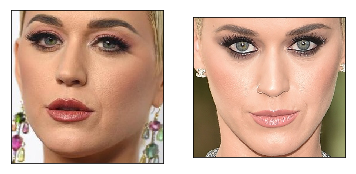

Cosine distance:  0.019822120666503906
Euclidean distance:  0.19910881
Euclidean distance - l2 form:  0.9999999791895069
these are same


In [12]:
displayImages(p1, p2)
print("Cosine distance: ",findCosineDistance(img1_representation, img2_representation))
print("Euclidean distance: ",findEuclideanDistance(img1_representation, img2_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img1_representation, img2_representation)))

if findCosineDistance(img1_representation, img2_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

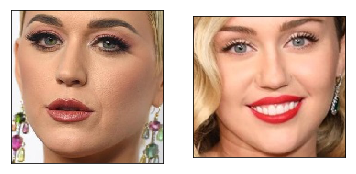

Cosine distance:  0.0255013108253479
Euclidean distance:  0.22583763
Euclidean distance - l2 form:  0.9999999993469462
these are different


In [13]:
displayImages(p1, p3)
print("Cosine distance: ",findCosineDistance(img1_representation, img3_representation))
print("Euclidean distance: ",findEuclideanDistance(img1_representation, img3_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img1_representation, img3_representation)))

if findCosineDistance(img1_representation, img3_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

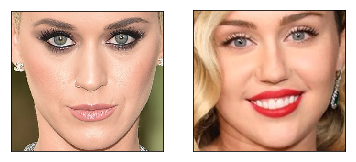

Cosine distance:  0.03243565559387207
Euclidean distance:  0.2546986
Euclidean distance - l2 form:  1.0000000062622778
these are different


In [14]:
displayImages(p2, p3)
print("Cosine distance: ",findCosineDistance(img2_representation, img3_representation))
print("Euclidean distance: ",findEuclideanDistance(img2_representation, img3_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img2_representation, img3_representation)))

if findCosineDistance(img2_representation, img3_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

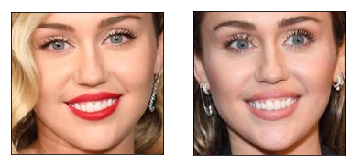

Cosine distance:  0.014958083629608154
Euclidean distance:  0.17296319
Euclidean distance - l2 form:  0.9999999995739396
these are same


In [15]:
displayImages(p3, p4)
print("Cosine distance: ",findCosineDistance(img3_representation, img4_representation))
print("Euclidean distance: ",findEuclideanDistance(img3_representation, img4_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img3_representation, img4_representation)))

if findCosineDistance(img3_representation, img4_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

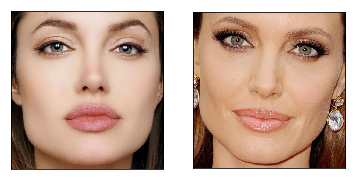

Cosine distance:  0.017569005489349365
Euclidean distance:  0.18745168
Euclidean distance - l2 form:  1.000000006725014
these are same


In [16]:
displayImages(p5, p6)
print("Cosine distance: ",findCosineDistance(img5_representation, img6_representation))
print("Euclidean distance: ",findEuclideanDistance(img5_representation, img6_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img5_representation, img6_representation)))

if findCosineDistance(img5_representation, img6_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

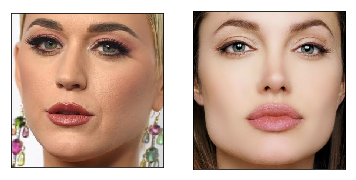

Cosine distance:  0.03905010223388672
Euclidean distance:  0.27946445
Euclidean distance - l2 form:  0.9999999837728721
these are different


In [17]:
displayImages(p1, p5)
print("Cosine distance: ",findCosineDistance(img1_representation, img5_representation))
print("Euclidean distance: ",findEuclideanDistance(img1_representation, img5_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img1_representation, img5_representation)))

if findCosineDistance(img1_representation, img5_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

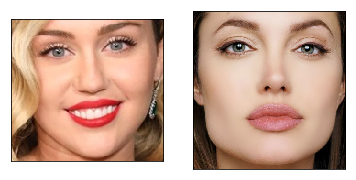

Cosine distance:  0.023996949195861816
Euclidean distance:  0.21907528
Euclidean distance - l2 form:  1.00000000589623
these are different


In [18]:
displayImages(p3, p5)
print("Cosine distance: ",findCosineDistance(img3_representation, img5_representation))
print("Euclidean distance: ",findEuclideanDistance(img3_representation, img5_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img3_representation, img5_representation)))

if findCosineDistance(img3_representation, img5_representation) < 0.02:
    print("these are same")
else:
    print("these are different")

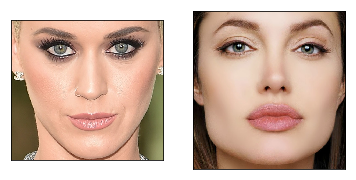

Cosine distance:  0.02035599946975708
Euclidean distance:  0.2017724
Euclidean distance - l2 form:  1.000000010522268
these are different


In [19]:
displayImages(p2, p5)
print("Cosine distance: ",findCosineDistance(img2_representation, img5_representation))
print("Euclidean distance: ",findEuclideanDistance(img2_representation, img5_representation))
print("Euclidean distance - l2 form: ",l2_normalize(findEuclideanDistance(img2_representation, img5_representation)))

if findCosineDistance(img2_representation, img5_representation) < 0.02:
    print("these are same")
else:
    print("these are different")